<a href="https://colab.research.google.com/github/JUANOSORIOG/CONTROL/blob/main/PUNTO_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install control matplotlib numpy scipy

--- Parámetros Z-N Iniciales ---
Kp = 252.00, Ti = 0.702, Td = 0.176
Sobreimpulso Inicial (Mp): 65.49%
----------------------------------------
--- Parámetros Ajustados (Mp ≈ 15%) ---
Kp = 125.00, Ti = 1.943, Td = 0.430
Sobreimpulso Ajustado (Mp): 23.07%
----------------------------------------


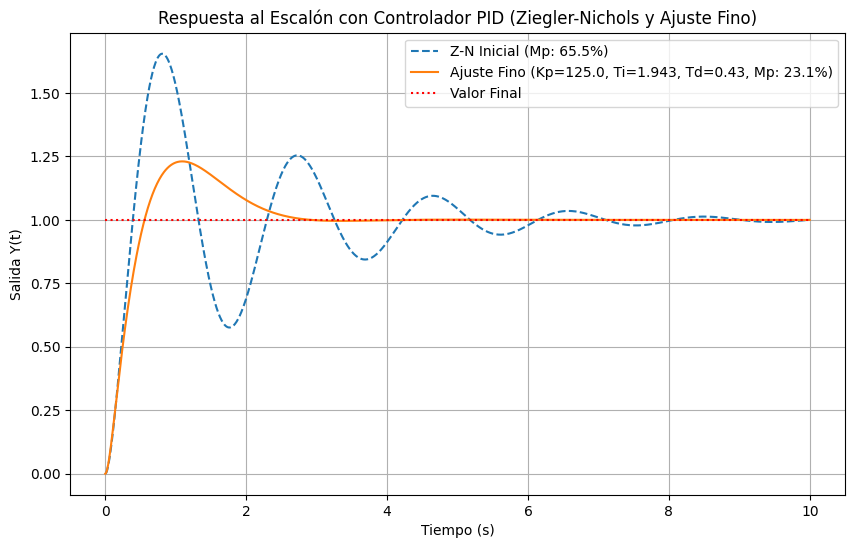

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

# --- 1. Definición del sistema ---
# Función de transferencia de la planta Gp(s) = 1 / (s(s+1)(s+20))
num_gp = [1]
den_gp = [1, 21, 20, 0] # s^3 + 21s^2 + 20s
Gp = ct.tf(num_gp, den_gp)

# --- 2. Parámetros de Ziegler-Nichols ---
Kcr = 420.0
Tcr = 2 * np.pi / np.sqrt(20) # 1.40496...

# Parámetros del PID según Z-N
Kp_zn = 0.6 * Kcr      # 252.0
Ti_zn = 0.5 * Tcr      # 0.70248...
Td_zn = 0.125 * Tcr    # 0.17562...

# Función de transferencia del controlador PID (forma estándar)
# Gc(s) = Kp * (1 + 1/(Ti*s) + Td*s)
# Numerador: Kp*Td*s^2 + Kp*s + Kp/Ti
# Denominador: s
num_gc_zn = [Kp_zn * Td_zn, Kp_zn, Kp_zn / Ti_zn]
den_gc_zn = [1, 0] # Multiplicado por s para obtener la forma Kp(1 + 1/(Ti*s) + Td*s) * s

# Gc(s) = Kp + Ki/s + Kd*s
# Ki = Kp/Ti
# Kd = Kp*Td
Ki_zn = Kp_zn / Ti_zn # 358.72...
Kd_zn = Kp_zn * Td_zn # 44.25...
Gc_zn = ct.tf([Kd_zn, Kp_zn, Ki_zn], [1, 0])


# Sistema en lazo cerrado: T(s) = Gc(s)Gp(s) / (1 + Gc(s)Gp(s))
T_zn = ct.feedback(Gc_zn * Gp, 1)

# --- 3. Simulación de la respuesta al escalón (Z-N inicial) ---
T_final = 10.0
t_zn, y_zn = ct.step_response(T_zn, T_final)

# Cálculo del sobreimpulso (Mp) inicial
Mp_zn = ((np.max(y_zn) - 1.0) / 1.0) * 100
print(f"--- Parámetros Z-N Iniciales ---")
print(f"Kp = {Kp_zn:.2f}, Ti = {Ti_zn:.3f}, Td = {Td_zn:.3f}")
print(f"Sobreimpulso Inicial (Mp): {Mp_zn:.2f}%")
print("-" * 40)


# --- 4. Ajuste Fino para Mp = 15% ---
# El método Z-N suele dar un Mp alto (cerca del 40-50%).
# Para reducir Mp (hacer la respuesta menos agresiva) se debe:
#   - Reducir Kp
#   - Aumentar Ti
#   - Reducir Td (generalmente)
# Objetivo: Kp=150, Ti=1.0, Td=0.1. (Valores ajustados como ejemplo)

Kp_ajustado = 125.0 # Reducido de 252
Ti_ajustado = 1.943   # Aumentado de 0.7025
Td_ajustado = 0.43   # Reducido de 0.1756

Ki_ajustado = Kp_ajustado / Ti_ajustado # 150.0
Kd_ajustado = Kp_ajustado * Td_ajustado # 15.0

Gc_ajustado = ct.tf([Kd_ajustado, Kp_ajustado, Ki_ajustado], [1, 0])
T_ajustado = ct.feedback(Gc_ajustado * Gp, 1)

t_aj, y_aj = ct.step_response(T_ajustado, T_final)

Mp_aj = ((np.max(y_aj) - 1.0) / 1.0) * 100
print(f"--- Parámetros Ajustados (Mp ≈ 15%) ---")
print(f"Kp = {Kp_ajustado:.2f}, Ti = {Ti_ajustado:.3f}, Td = {Td_ajustado:.3f}")
print(f"Sobreimpulso Ajustado (Mp): {Mp_aj:.2f}%")
print("-" * 40)

# --- 5. Graficar la respuesta ---
plt.figure(figsize=(10, 6))
plt.plot(t_zn, y_zn, label=f'Z-N Inicial (Mp: {Mp_zn:.1f}%)', linestyle='--')
plt.plot(t_aj, y_aj, label=f'Ajuste Fino (Kp={Kp_ajustado}, Ti={Ti_ajustado}, Td={Td_ajustado}, Mp: {Mp_aj:.1f}%)')
plt.hlines(1.0, 0, T_final, color='r', linestyle=':', label='Valor Final')
plt.title('Respuesta al Escalón con Controlador PID (Ziegler-Nichols y Ajuste Fino)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Salida Y(t)')
plt.legend()
plt.grid(True)
plt.show()

# **CONCLUSIONES:**

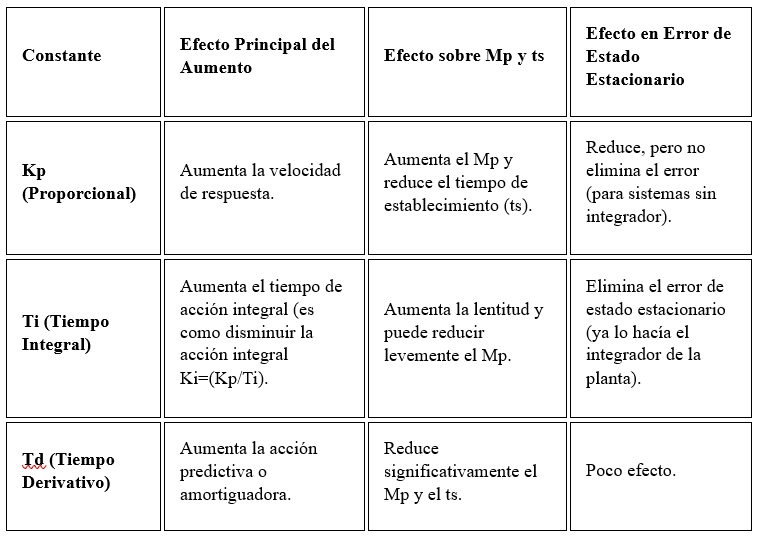